In [1]:
import scipy.signal as ss
import numpy as np 
import matplotlib.pyplot as plt

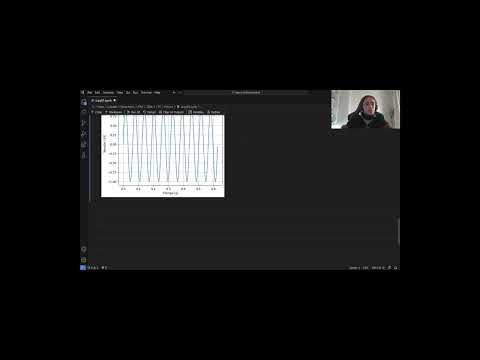

In [2]:

from IPython.display import YouTubeVideo

YouTubeVideo('9nttbBgIT-g', width=800, height=450)

## Señales de Salida

In [3]:
#Queremos definir una señal en función del tiempo

#definimos los puntos del tiempo
t = np.linspace(0, 2*np.pi*4, 500) 

#Definimos una señal
#El seno y el coseno se encuentran en la librería de numpy por ejemplo

#Hacemos un seno de frecuencia 2piHz
function =  np.sin(t)



<function matplotlib.pyplot.show(close=None, block=None)>

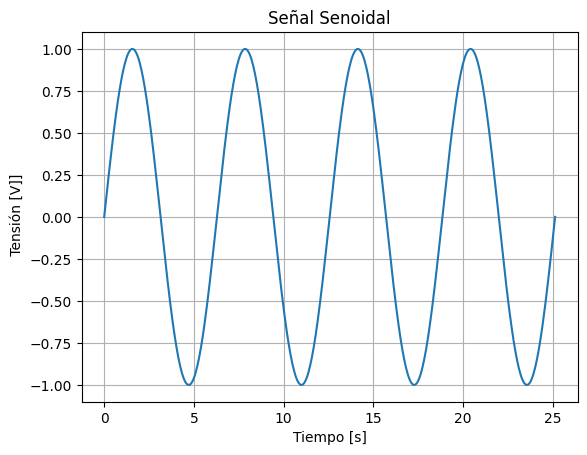

In [4]:
#Podemos graficarlo 

plt.figure()
plt.plot(t, function) #(x,y)
plt.title('Señal Senoidal')
plt.xlabel('Tiempo [s]')
plt.ylabel(' Tensión [V]]')
plt.grid(True)
plt.show


## Simulación de sistemas 

In [5]:
#Ejemplo: representar una transferencia de un filtro pasa bajos RLC serie
R=500
L=10E-3
C=10E-9


num = [1]
den = [L*C, R*C, 1]

H_lowpass= ss.lti(num, den)
display(H_lowpass)
display(H_lowpass.to_zpk())
print('f_o = 10000 [rad/s]')

TransferFunctionContinuous(
array([1.e+10]),
array([1.e+00, 5.e+04, 1.e+10]),
dt: None
)

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-25000.+96824.58365519j, -25000.-96824.58365519j]),
10000000000.0,
dt: None
)

f_o = 10000 [rad/s]


Ahora, vamos definir distintas señales para ver que resultado brindan al ingresar al sistema del filtro pasabajos

In [6]:
#La obtención de la salida del sistema se logra con lsim que simula este sistema (en esta caso el filtro pasa bajos)

#Una señal de 100rad/s no debería verse atenuada por el filtro
frecuencia = 100 #[rad/s]
t = np.arange(0, 10*2*np.pi/frecuencia , 2*np.pi/(frecuencia*100))
function_100=  np.sin(t*frecuencia)

#t_out: tiempo de la señal de salida
#y_out: tensión de la señal de salida
t_out_100, y_out_100, x_out_100= ss.lsim(H_lowpass, U=function_100, T=t) 

<function matplotlib.pyplot.show(close=None, block=None)>

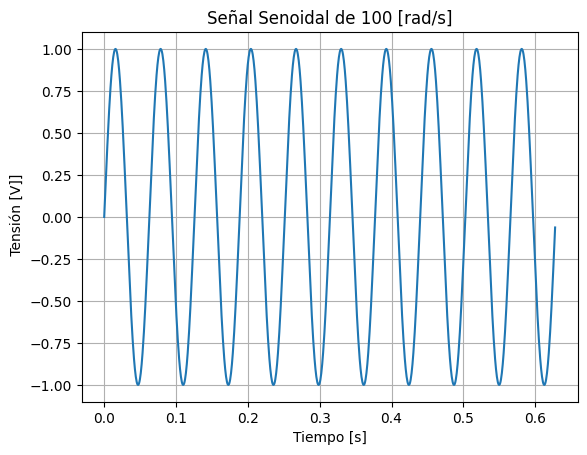

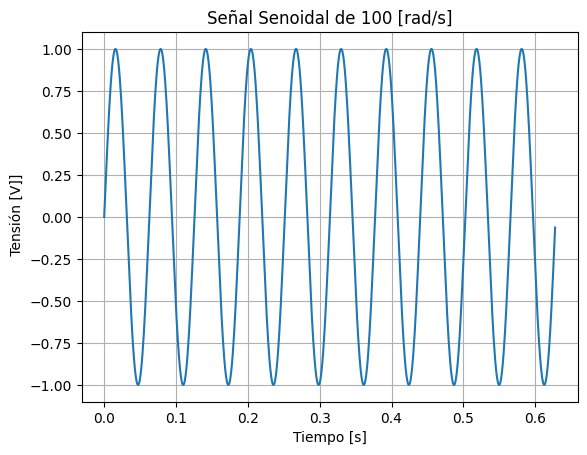

In [7]:
#Entrada del sistema
plt.figure()
plt.plot(t, function_100) #(x,y)
plt.title('Señal Senoidal de 100 [rad/s]')
plt.xlabel('Tiempo [s]')
plt.ylabel(' Tensión [V]]')
plt.grid(True)
plt.show

#Salida del sistema
plt.figure()
plt.plot(t_out_100, y_out_100) #(x,y)
plt.title('Señal Senoidal de 100 [rad/s]')
plt.xlabel('Tiempo [s]')
plt.ylabel(' Tensión [V]]')
plt.grid(True)
plt.show

In [8]:
#Debido al Q, en la frecuencia de corte, la señal se va a ver amplificada
frecuencia = 100000 #[rad/s]
t = np.arange(0, 300*2*np.pi/frecuencia , 2*np.pi/(frecuencia*100))

function_100000 =  np.sin(t*frecuencia)
t_out_100000, y_out_100000, x_out_100000 = ss.lsim(H_lowpass, U=function_100000, T=t) 


<function matplotlib.pyplot.show(close=None, block=None)>

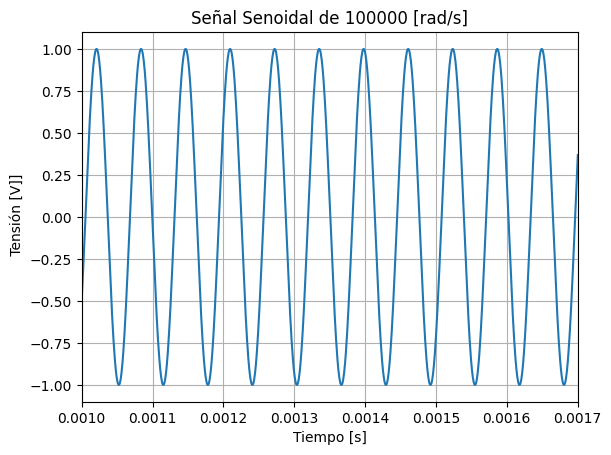

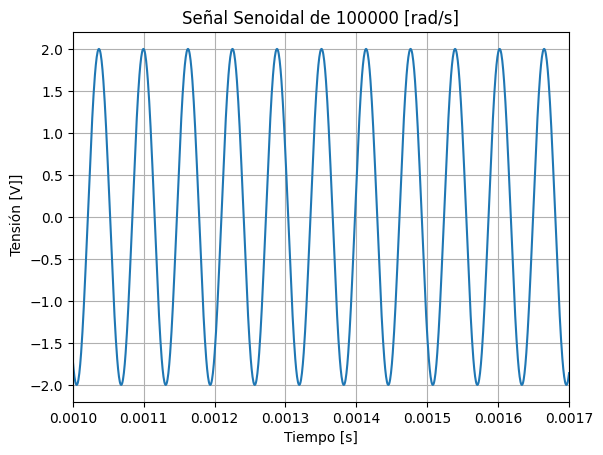

In [9]:

#Entrada del sistema
plt.figure()
plt.plot(t, function_100000) #(x,y)
plt.title('Señal Senoidal de 100000 [rad/s]')
plt.xlim([0.0010, 0.0017])
plt.xlabel('Tiempo [s]')
plt.ylabel(' Tensión [V]]')
plt.grid(True)
plt.show

#Salida del sistema
plt.figure()
plt.plot(t_out_100000, y_out_100000) #(x,y)
plt.title('Señal Senoidal de 100000 [rad/s]')
plt.xlim([0.0010, 0.0017])
#plt.ylim([-1, 1])
plt.xlabel('Tiempo [s]')
plt.ylabel(' Tensión [V]]')
plt.grid(True)
plt.show

In [10]:
#En frecuencias muy grandes, la señal va a estar atenuada completamente
frecuencia = 500000 #[rad/s]
t = np.arange(0, 300*2*np.pi/frecuencia , 2*np.pi/(frecuencia*100))

function_500000 =  np.sin(t*frecuencia)
t_out_500000, y_out_500000, x_out_500000 = ss.lsim(H_lowpass, U=function_500000, T=t) 

<function matplotlib.pyplot.show(close=None, block=None)>

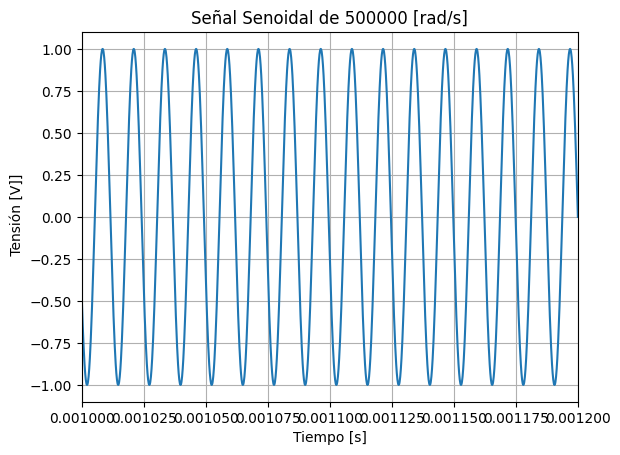

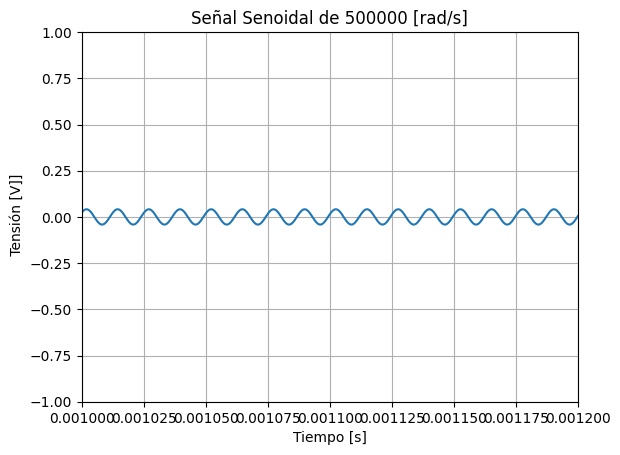

In [11]:

#Entrada del sistema
plt.figure()
plt.plot(t, function_500000) #(x,y)
plt.title('Señal Senoidal de 500000 [rad/s]')
plt.xlim([0.0010, 0.0012])
plt.xlabel('Tiempo [s]')
plt.ylabel(' Tensión [V]]')
plt.grid(True)
plt.show

#Salida del sistema
plt.figure()
plt.plot(t_out_500000, y_out_500000) #(x,y)
plt.title('Señal Senoidal de 500000 [rad/s]')
plt.xlim([0.0010, 0.0012])
plt.ylim([-1, 1])
plt.xlabel('Tiempo [s]')
plt.ylabel(' Tensión [V]]')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

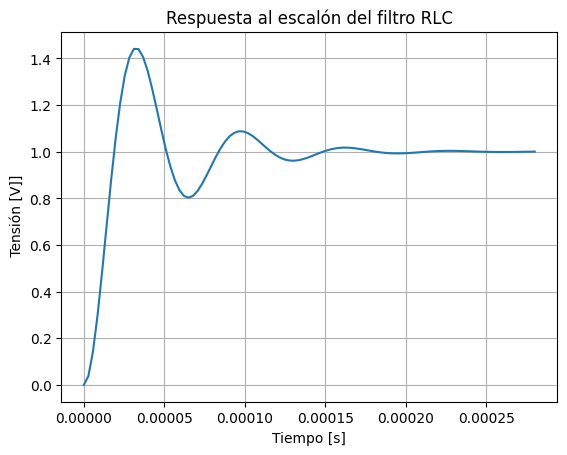

In [12]:
#Respuesta al escalón

t, step_response =  ss.step(H_lowpass)


plt.figure()
plt.plot(t, step_response) #(x,y)
plt.title('Respuesta al escalón del filtro RLC')
plt.xlabel('Tiempo [s]')
plt.ylabel(' Tensión [V]]')
plt.grid(True)
plt.show